# Chapter 4 - Shallow Embeddings

In [41]:
import os
import sys

sys.path.append(f"{os.getcwd()}/..")

from utils import draw_graph, FIGURES_DIR

## Graph Factorization

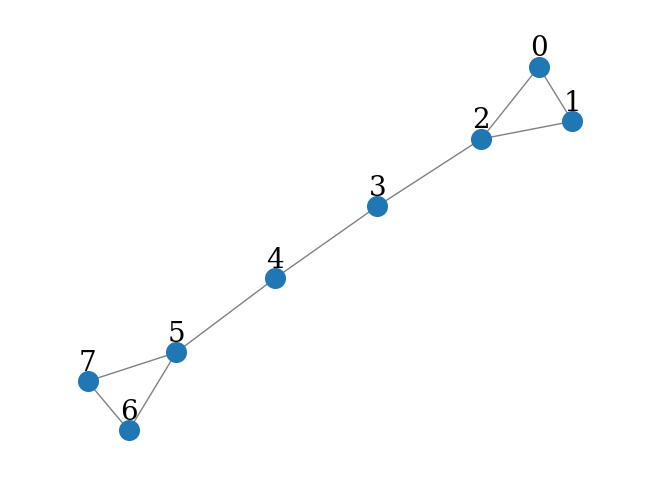

In [42]:
import networkx as nx

G = nx.barbell_graph(m1=3, m2=2)
draw_graph(G, node_size=200)

In [43]:
from pathlib import Path
(Path("gem") / "intermediate").mkdir(parents=True, exist_ok=True)

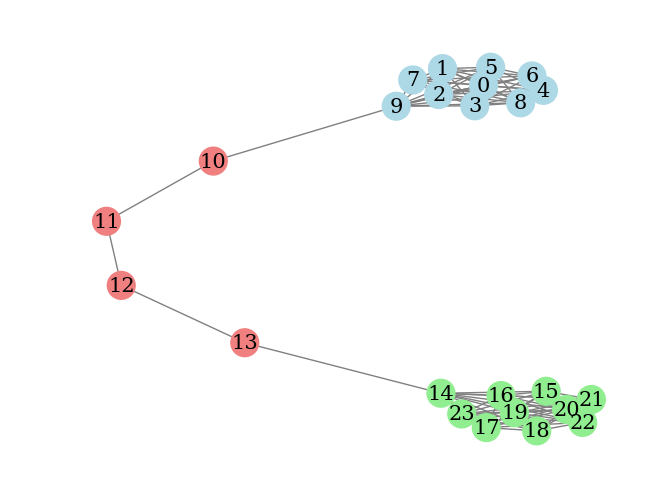

In [44]:
import numpy as np
import matplotlib.pyplot as plt

G = nx.barbell_graph(m1=10, m2=4)

def get_color(x: int):
    if x<10:
        return "lightblue", "steelblue"
    elif x<14:
        return "lightcoral", "red"
    else:
        return "lightgreen", "limegreen"

color_code = lambda x: get_color(x) # for x in G.nodes()

edge_color_code = lambda x, y: (color_code(x)[0], color_code(y)[1])

def plot_embeddings(V):

    fig, ax = plt.subplots(figsize=(5,5))
    
    for x in range(V.shape[0]):

        color = color_code(x)
        ax.scatter(V[x, 0],V[x, 1], s=1)
        ax.text(V[x, 0], V[x, 1], str(x),
                ha="center", va="center", 
                bbox=dict(boxstyle="circle,pad=0.3",
                          fc=color[0], ec=color[1], lw=2))
    return fig, ax

def plot_edge_embeddings(V, edges):
    fig, ax = plt.subplots(figsize=(5,5))
    
    for x in range(V.shape[0]):
        source, target = edges[x]  
        color = edge_color_code(source, target)
        ax.scatter(V[x, 0],V[x, 1], s=1)
        ax.text(V[x, 0], V[x, 1], str(x),
                ha="center", va="center", 
                bbox=dict(boxstyle="circle,pad=0.3",
                          fc=color[0], ec=color[1], lw=2))
    return fig, ax
    
def draw_graph(G, node_names={}, filename=None, node_size=50, layout = None, plot_weight=False):
    pos_nodes = nx.spring_layout(G) if layout is None else layout(G)
    node_names = {k: k for k, v in G.nodes.items()} if not node_names else node_names
    node_colors = [color_code(x)[0] for x in G.nodes()]
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', node_color=node_colors)

    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1])

    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif', font_size=15)

    if plot_weight:
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

    if filename:
        plt.savefig(FIGURES_DIR / filename, format="png")



draw_graph(G, node_size=400, filename= "barbell.png")

In [5]:
from gem.embedding.gf import GraphFactorization

gf = GraphFactorization(d=2,  data_set=None,max_iter=10000, eta=1*10**-4, regu=1.0)
gf.learn_embedding(G)

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


array([[ 2.95850890e-03,  1.53587266e-05],
       [ 2.95633484e-03,  1.65974931e-05],
       [ 2.96335880e-03,  1.86992083e-05],
       [ 2.96369483e-03, -1.15516559e-05],
       [ 2.99888702e-03, -3.13947500e-06],
       [ 2.83273191e-03,  4.45982842e-05],
       [ 3.20303266e-03, -1.02110718e-05],
       [ 2.34517829e-03, -2.48212379e-04],
       [ 7.51771759e-04,  2.20302979e-03],
       [ 8.08401156e-03,  7.73875139e-04],
       [ 6.82307744e-03,  1.21123721e-03],
       [ 7.74028818e-03,  3.57769367e-03],
       [ 8.92395437e-03,  5.95435897e-03],
       [-2.24327522e-03,  6.34222630e-03],
       [-8.50338290e-03,  7.76064514e-04],
       [-8.50440132e-03,  7.74746187e-04],
       [-8.50836606e-03,  7.83177466e-04],
       [-8.48239084e-03,  7.61556817e-04],
       [-8.53850058e-03,  7.64439345e-04],
       [-8.45672279e-03,  8.42846869e-04],
       [-8.26616668e-03,  1.18857751e-03],
       [-9.16950282e-03, -1.30328692e-03],
       [-8.02977677e-03,  1.70413675e-03],
       [-8.

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x73d59f500250>)

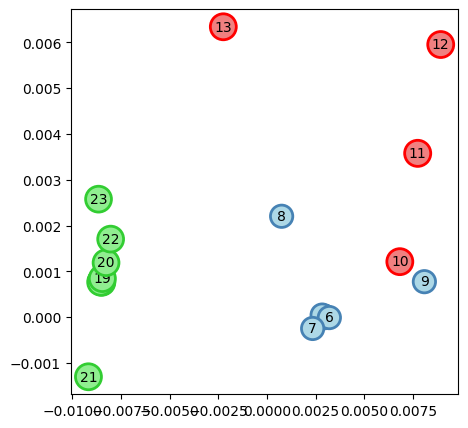

In [6]:
V=np.matrix(gf.get_embedding())

plot_embeddings(V)

## GraphRep

In [10]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.grarep import GraRep

gr = GraRep(dimensions=2,order=3)
gr.fit(G)

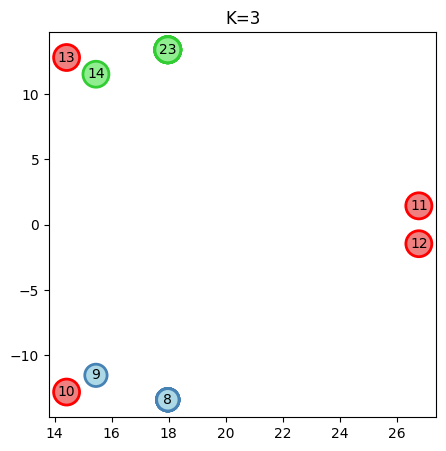

In [57]:
k=3
ida = (k-1)*2
idb = (k-1)*2+1

V = np.matrix(gr.get_embedding())[:, [ida,idb]]

fig, ax = plot_embeddings(V)
ax.set_title(f"K={k}")

plt.savefig(FIGURES_DIR / f"K{k}.png", format="png")

## HOPE

SVD error (low rank): 0.052092


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x73d5718dd160>)

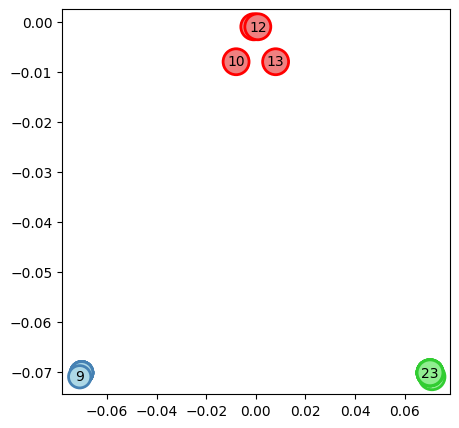

In [14]:
import networkx as nx
from gem.embedding.hope import HOPE

hp = HOPE(d=4, beta=0.01)
V=np.matrix(hp.learn_embedding(G))[:, 2:]

plot_embeddings(V)

## DeepWalk

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x73d57e2d2fa0>)

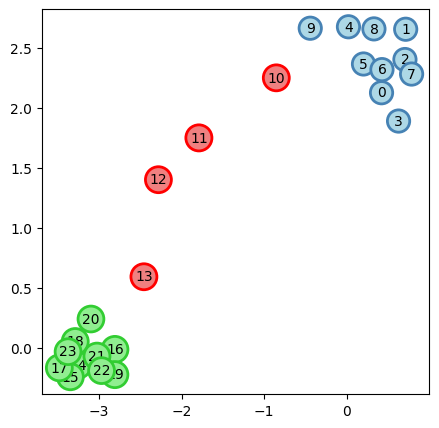

In [15]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

dw = DeepWalk(dimensions=2)
dw.fit(G)

V=np.matrix(dw.get_embedding())

plot_embeddings(V)

## Node2Vec

In [60]:
import networkx as nx
from node2vec import Node2Vec

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
embeddings = model.wv

Generating walks (CPU: 1): 100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 23.73it/s]


In [61]:
V = np.matrix([model.wv[str(x)] for x in G.nodes()])

(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x73d52a2fd400>)

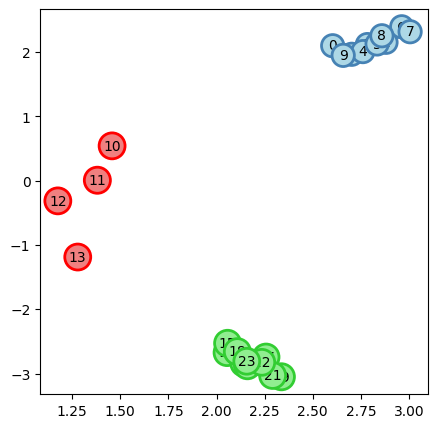

In [62]:
plot_embeddings(V)

## Edge2Vec

In [63]:
from node2vec.edges import HadamardEmbedder, AverageEmbedder, WeightedL1Embedder, WeightedL2Embedder

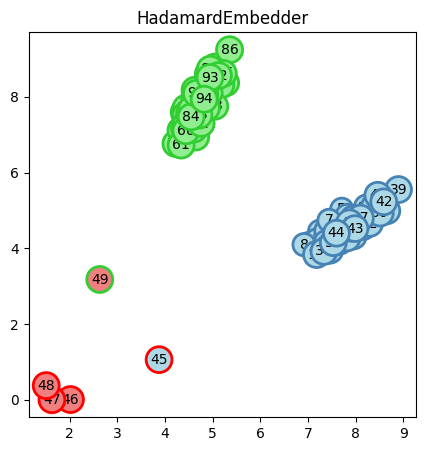

In [64]:
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)
V = np.matrix([edges_embs[str(x), str(y)] for x, y in G.edges()])
fig, ax = plot_edge_embeddings(V, list(G.edges()))

ax.set_title("HadamardEmbedder")
plt.savefig(FIGURES_DIR / "HadamardEmbedder.png", format="png")

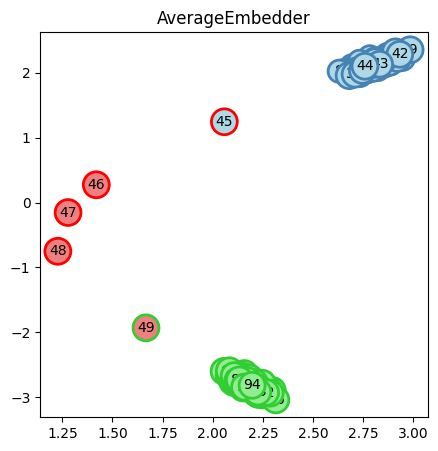

In [65]:
edges_embs = AverageEmbedder(keyed_vectors=model.wv)
V = np.matrix([edges_embs[str(x), str(y)] for x, y in G.edges()])
fig, ax = plot_edge_embeddings(V, list(G.edges()))

ax.set_title("AverageEmbedder")
plt.savefig(FIGURES_DIR / "AverageEmbedder.png", format="png")

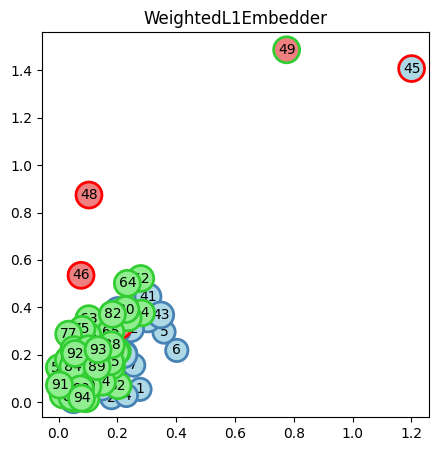

In [66]:
edges_embs = WeightedL1Embedder(keyed_vectors=model.wv)
V = np.matrix([edges_embs[str(x), str(y)] for x, y in G.edges()])
fig, ax = plot_edge_embeddings(V, list(G.edges()))

ax.set_title("WeightedL1Embedder")
plt.savefig(FIGURES_DIR / "WeightedL1Embedder.png", format="png")

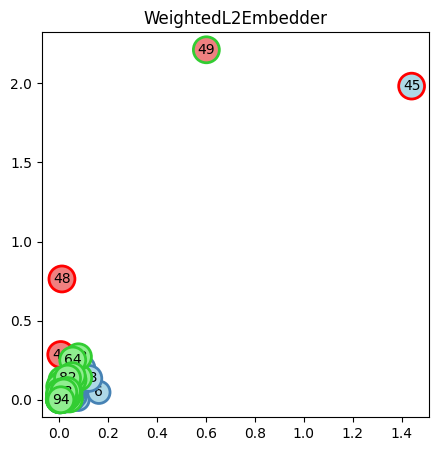

In [67]:
edges_embs = WeightedL2Embedder(keyed_vectors=model.wv)
V = np.matrix([edges_embs[str(x), str(y)] for x, y in G.edges()])
fig, ax = plot_edge_embeddings(V, list(G.edges()))

ax.set_title("WeightedL2Embedder")
plt.savefig(FIGURES_DIR / "WeightedL2Embedder.png", format="png")

## Graph2Vec

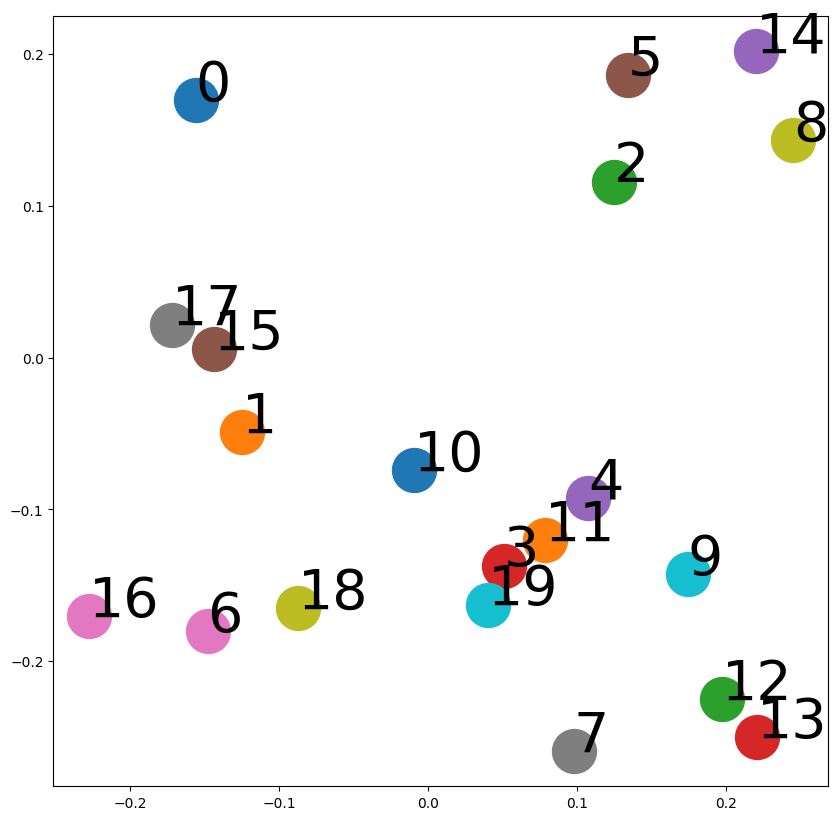

In [24]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):
    
    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)